In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy.stats
from scipy.interpolate import UnivariateSpline

In [2]:
mpl.rcParams['figure.figsize'] = [10, 8]
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['font.family'] = "Helvetica"
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['font.size'] = 18
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

#sns.set_style('white')
#sns.set_style('ticks')

In [3]:
palette_tab10 = sns.color_palette("tab10", 10)

# Validation

In [4]:
# Selecting all snapshots back to z=3, peak star formation happens around z=2
snapshots = [99, 91, 83, 75, 67, 59, 51, 43, 35, 25]
print(snapshots)

[99, 91, 83, 75, 67, 59, 51, 43, 35, 25]


In [5]:
redshifts = np.load('data/redshifts.npy')
redshifts = np.flip(redshifts)[snapshots]
print(redshifts)

[2.22044605e-16 9.94018026e-02 2.14425036e-01 3.47853842e-01
 5.03047523e-01 7.00106354e-01 9.50531352e-01 1.30237846e+00
 1.82268925e+00 3.00813107e+00]


In [6]:
ages = np.load('data/ages.npy')
ages = np.flip(ages)[snapshots]
print(ages)
print(np.diff(ages))

[13.80271833 12.46636383 11.13756151  9.83708686  8.58656951  7.31414105
  6.07331943  4.81591437  3.59298263  2.14538275]
[-1.33635449 -1.32880232 -1.30047466 -1.25051734 -1.27242847 -1.24082162
 -1.25740506 -1.22293174 -1.44759988]


In [8]:
df_weights = pd.read_hdf('results/causal_model_halo_mass/weights.h5', 'snapshots_all')
df_weights = df_weights.unstack(level=1)

In [9]:
df_weights

weight                                                              \
SnapNum       13        25        35        43        51        59        67   
SubhaloID                                                                      
0            1.0  0.771718  0.868366  0.336706  0.700722  0.427437  0.867974   
1            1.0  1.493268  0.291524  0.492463  0.856146  2.440070  0.931239   
2            1.0  0.479253  0.942005  1.126624  1.317315  0.787669  0.833326   
3            1.0  0.918058  1.541753  1.057560  1.187291  0.751089  0.754664   
5            1.0  1.352662  0.419457  0.910157  0.492224  0.889396  0.872265   
...          ...       ...       ...       ...       ...       ...       ...   
803349       1.0  1.298348  0.875830  0.904527  0.953112  1.853446  0.896754   
807840       1.0  0.964237  0.527823  1.500184  0.900037  0.775063  0.795546   
809675       1.0  0.874705  0.842403  0.937972  0.938827  0.924942  0.721189   
813831       1.0  1.072165  0.836224  0.989170  0.871942  1.023677  0.822869   
818395       1.0  0.831897  0.903949  0.859327  0.755712  1.210058  1.420901   

                                                       
SnapNum             75         83        91        99  
SubhaloID                                              
0             0.925931   1.001561  0.938731  0.916164  
1             1.008082   0.809673  0.865980  0.931510  
2             0.821466   0.937775  0.924475  0.937003  
3             0.725967   0.713896  0.932278  0.946509  
5             0.962560   0.927326  1.155330  0.951641  
...                ...        ...       ...       ...  
803349        0.598324   0.739632  0.942166  3.689203  
807840     1160.684982   0.810573  1.194564  6.158364  
809675        0.897048  29.141858  3.203179  0.717684  
813831        0.807452   0.685786  1.021445  0.915628  
818395        1.121172   0.939166  1.394542  1.090300  

[18629 rows x 11 columns]

In [10]:
df_weights = df_weights.drop(columns=[('weight', 13)])

In [11]:
df_weights

weight                                                    \
SnapNum          25        35        43        51        59        67   
SubhaloID                                                               
0          0.771718  0.868366  0.336706  0.700722  0.427437  0.867974   
1          1.493268  0.291524  0.492463  0.856146  2.440070  0.931239   
2          0.479253  0.942005  1.126624  1.317315  0.787669  0.833326   
3          0.918058  1.541753  1.057560  1.187291  0.751089  0.754664   
5          1.352662  0.419457  0.910157  0.492224  0.889396  0.872265   
...             ...       ...       ...       ...       ...       ...   
803349     1.298348  0.875830  0.904527  0.953112  1.853446  0.896754   
807840     0.964237  0.527823  1.500184  0.900037  0.775063  0.795546   
809675     0.874705  0.842403  0.937972  0.938827  0.924942  0.721189   
813831     1.072165  0.836224  0.989170  0.871942  1.023677  0.822869   
818395     0.831897  0.903949  0.859327  0.755712  1.210058  1.420901   

                                                       
SnapNum             75         83        91        99  
SubhaloID                                              
0             0.925931   1.001561  0.938731  0.916164  
1             1.008082   0.809673  0.865980  0.931510  
2             0.821466   0.937775  0.924475  0.937003  
3             0.725967   0.713896  0.932278  0.946509  
5             0.962560   0.927326  1.155330  0.951641  
...                ...        ...       ...       ...  
803349        0.598324   0.739632  0.942166  3.689203  
807840     1160.684982   0.810573  1.194564  6.158364  
809675        0.897048  29.141858  3.203179  0.717684  
813831        0.807452   0.685786  1.021445  0.915628  
818395        1.121172   0.939166  1.394542  1.090300  

[18629 rows x 10 columns]

In [12]:
# Trimming weights
lower_quantile = df_weights.quantile(0.01)
upper_quantile = df_weights.quantile(0.99)
df_weights = df_weights[(df_weights > lower_quantile) & (df_weights < upper_quantile)]

In [13]:
df_weights

weight                                                    \
SnapNum          25        35        43        51        59        67   
SubhaloID                                                               
0          0.771718  0.868366  0.336706  0.700722  0.427437  0.867974   
1          1.493268  0.291524  0.492463  0.856146  2.440070  0.931239   
2          0.479253  0.942005  1.126624  1.317315  0.787669  0.833326   
3          0.918058  1.541753  1.057560  1.187291  0.751089  0.754664   
5          1.352662  0.419457  0.910157  0.492224  0.889396  0.872265   
...             ...       ...       ...       ...       ...       ...   
803349     1.298348  0.875830  0.904527  0.953112  1.853446  0.896754   
807840     0.964237  0.527823  1.500184  0.900037  0.775063  0.795546   
809675     0.874705  0.842403  0.937972  0.938827  0.924942  0.721189   
813831     1.072165  0.836224  0.989170  0.871942  1.023677  0.822869   
818395     0.831897  0.903949  0.859327  0.755712  1.210058  1.420901   

                                                   
SnapNum          75        83        91        99  
SubhaloID                                          
0          0.925931  1.001561  0.938731  0.916164  
1          1.008082  0.809673  0.865980  0.931510  
2          0.821466  0.937775  0.924475  0.937003  
3          0.725967  0.713896  0.932278  0.946509  
5          0.962560  0.927326  1.155330  0.951641  
...             ...       ...       ...       ...  
803349     0.598324  0.739632  0.942166       NaN  
807840          NaN  0.810573  1.194564       NaN  
809675     0.897048       NaN       NaN  0.717684  
813831     0.807452  0.685786  1.021445  0.915628  
818395     1.121172  0.939166  1.394542  1.090300  

[18629 rows x 10 columns]

In [14]:
df_weights = df_weights.stack()

In [15]:
df_weights

weight
SubhaloID SnapNum          
0         25       0.771718
          35       0.868366
          43       0.336706
          51       0.700722
          59       0.427437
...                     ...
818395    67       1.420901
          75       1.121172
          83       0.939166
          91       1.394542
          99       1.090300

[182550 rows x 1 columns]

In [16]:
df_weights = df_weights.reset_index() 

In [17]:
df_weights

,SubhaloID,SnapNum,weight
0,0,25,0.771718
1,0,35,0.868366
2,0,43,0.336706
3,0,51,0.700722
4,0,59,0.427437
...,...,...,...
182545,818395,67,1.420901
182546,818395,75,1.121172
182547,818395,83,0.939166
182548,818395,91,1.394542


In [18]:
def annotate(data, **kws):
    
    ax = plt.gca()
    snapshot = int(ax.get_title()[10:])
    mean = df_weights['weight'][df_weights['SnapNum'] == snapshot].mean()
    #mean = df_weights['weight'][df_weights['SnapNum'] == snapshot].median()
    ax.text(0.9, 0.05, f'$\mu = {mean:.3f}$', horizontalalignment='center', verticalalignment='center', transform=ax.transAxes)
    ax.axvline(x=mean, color=palette_tab10[0], ls='--', lw=2)

### Causal Model

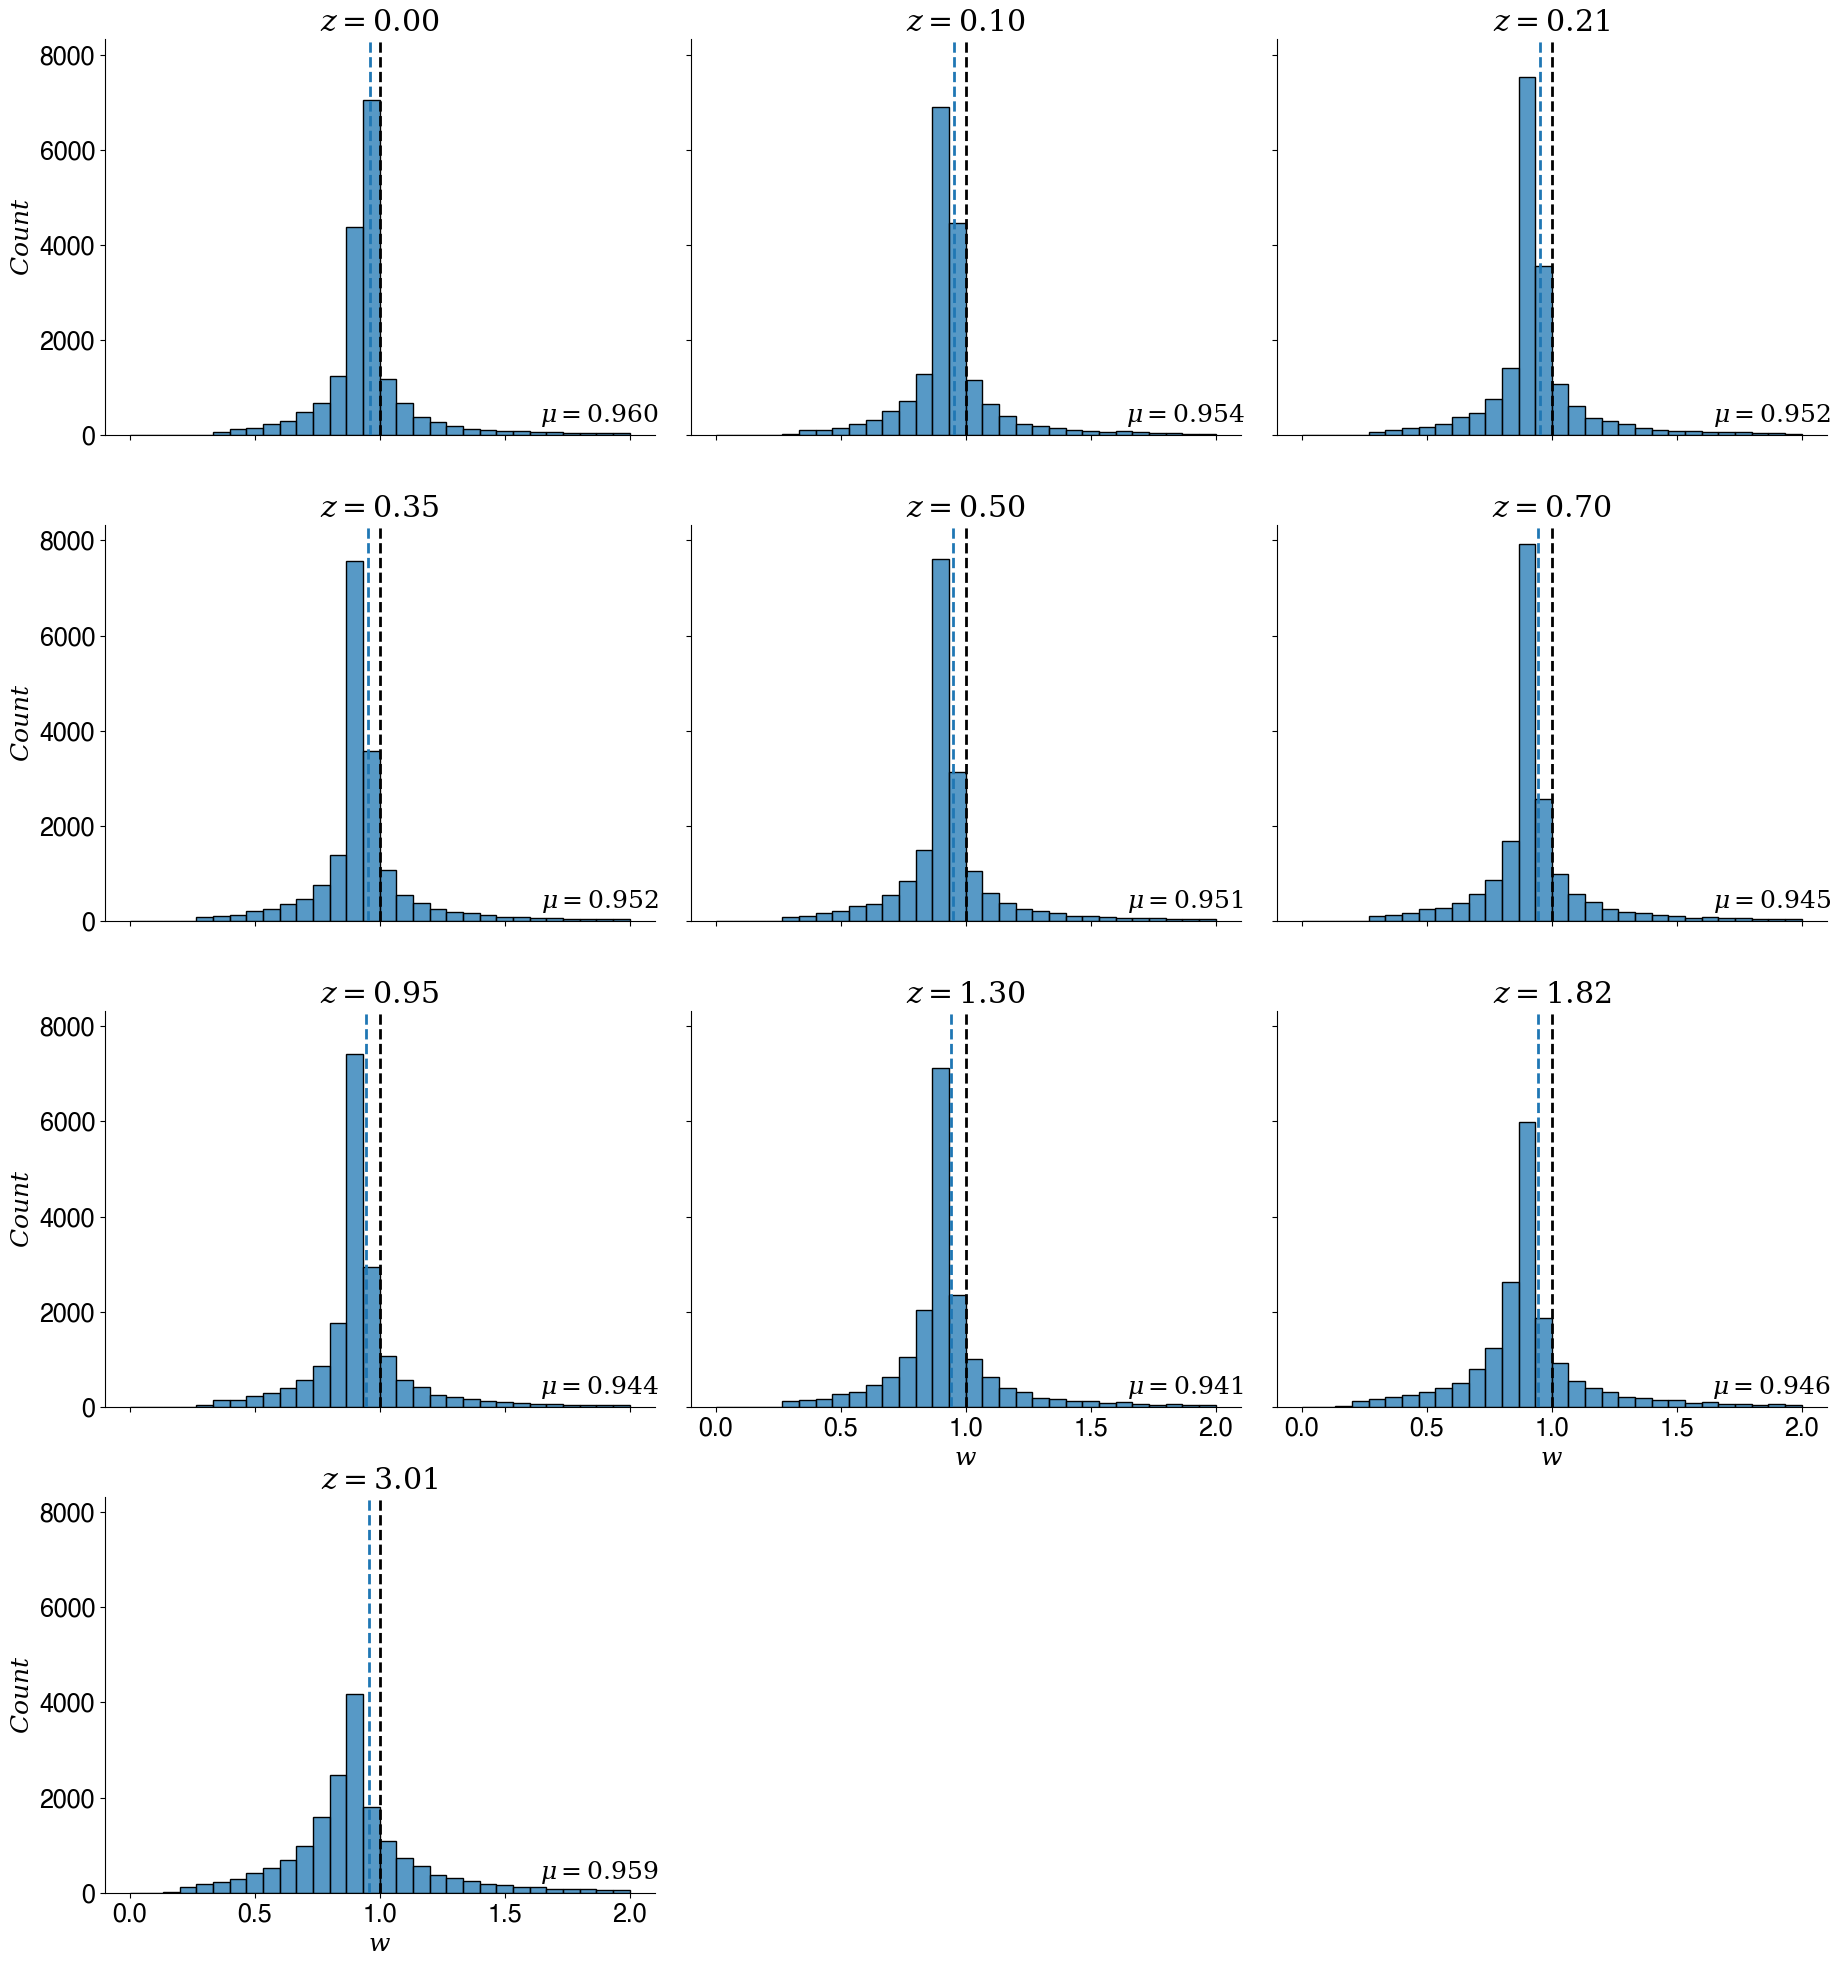

In [19]:
g = sns.FacetGrid(df_weights, col="SnapNum", aspect=1.25, height=5, col_wrap=3, col_order=snapshots)
g.map_dataframe(sns.histplot, x="weight", bins=30, binrange=[0, 2])
g.map_dataframe(annotate)
g.refline(x=1, color='k', ls='--', lw=2)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(f'$z = {redshifts[i]:.2f}$')

g.set_xlabels(r'$w$')
g.set_ylabels(r'$Count$')
g.tight_layout()
#plt.savefig('plots/paper/weight_distribution_causal_model_subhalo_mass.png', dpi=300, bbox_inches='tight')
plt.show()

### Traditional Model

In [21]:
df_weights = pd.read_hdf('results/traditional_model/weights.h5', 'snapshots_all')
df_weights = df_weights.unstack(level=1)

In [22]:
df_weights

weight                                                    \
SnapNum          13        25        35        43        51        59   
SubhaloID                                                               
0          0.067141  0.076414  0.167479  0.020782  0.041433  0.002194   
1          0.235994  0.245447  0.196030  0.107793  0.175270  0.029524   
2          0.041099  0.060231  0.234632  0.286255  0.298631  0.296188   
3          0.372281  0.965356  2.127471  0.366424  0.304888  0.285608   
5          0.315806  0.440899  0.161794  0.246839  0.084168  0.184143   
...             ...       ...       ...       ...       ...       ...   
803349     0.621245  0.786225  0.706459  1.139917  0.941520  0.950001   
807840     0.723690  1.128249  5.008313  6.238784  0.768550  3.655903   
809675     0.815038  0.784493  0.738096  0.726031  0.784745  0.646605   
813831     0.737680  0.917977  0.880104  0.756580  1.005973  0.468337   
818395     0.640356  0.856959  0.771255  0.861848  1.067973  0.649215   

                                                             
SnapNum          67        75        83        91        99  
SubhaloID                                                    
0          0.049663  0.084637  0.031805  0.070653  0.042008  
1          0.171620  0.402202  0.463781  0.145999  0.349708  
2          0.226461  0.218730  0.303973  0.276849  0.384962  
3          0.352387  0.484362  0.588562  0.594228  0.589079  
5          0.289551  0.408249  0.331281  0.596155  0.536998  
...             ...       ...       ...       ...       ...  
803349     1.533263  0.574706  0.687269  0.824099  0.530362  
807840     3.946405  0.565842  0.681554  1.380511  0.606655  
809675     0.730701  5.745478  0.626202  0.910251  1.148184  
813831     1.382565  1.771449  0.539381  0.552868  0.574160  
818395     0.814890  0.564081  2.897685  0.896190  1.122208  

[18629 rows x 11 columns]

In [23]:
df_weights = df_weights.drop(columns=[('weight', 13)])

In [24]:
df_weights

weight                                                    \
SnapNum          25        35        43        51        59        67   
SubhaloID                                                               
0          0.076414  0.167479  0.020782  0.041433  0.002194  0.049663   
1          0.245447  0.196030  0.107793  0.175270  0.029524  0.171620   
2          0.060231  0.234632  0.286255  0.298631  0.296188  0.226461   
3          0.965356  2.127471  0.366424  0.304888  0.285608  0.352387   
5          0.440899  0.161794  0.246839  0.084168  0.184143  0.289551   
...             ...       ...       ...       ...       ...       ...   
803349     0.786225  0.706459  1.139917  0.941520  0.950001  1.533263   
807840     1.128249  5.008313  6.238784  0.768550  3.655903  3.946405   
809675     0.784493  0.738096  0.726031  0.784745  0.646605  0.730701   
813831     0.917977  0.880104  0.756580  1.005973  0.468337  1.382565   
818395     0.856959  0.771255  0.861848  1.067973  0.649215  0.814890   

                                                   
SnapNum          75        83        91        99  
SubhaloID                                          
0          0.084637  0.031805  0.070653  0.042008  
1          0.402202  0.463781  0.145999  0.349708  
2          0.218730  0.303973  0.276849  0.384962  
3          0.484362  0.588562  0.594228  0.589079  
5          0.408249  0.331281  0.596155  0.536998  
...             ...       ...       ...       ...  
803349     0.574706  0.687269  0.824099  0.530362  
807840     0.565842  0.681554  1.380511  0.606655  
809675     5.745478  0.626202  0.910251  1.148184  
813831     1.771449  0.539381  0.552868  0.574160  
818395     0.564081  2.897685  0.896190  1.122208  

[18629 rows x 10 columns]

In [25]:
df_weights.max()

        SnapNum
weight  25          381.189150
        35          436.679376
        43         1905.995106
        51          130.395194
        59           69.065929
        67           48.602314
        75           51.169132
        83           42.265142
        91           25.441950
        99           31.390099
dtype: float64

In [26]:
# Trimming weights
lower_quantile = df_weights.quantile(0.01)
upper_quantile = df_weights.quantile(0.99)
df_weights = df_weights[(df_weights > lower_quantile) & (df_weights < upper_quantile)]

In [27]:
df_weights

weight                                                    \
SnapNum          25        35        43        51        59        67   
SubhaloID                                                               
0               NaN  0.167479       NaN       NaN       NaN       NaN   
1          0.245447  0.196030       NaN  0.175270       NaN       NaN   
2               NaN  0.234632  0.286255  0.298631  0.296188  0.226461   
3          0.965356  2.127471  0.366424  0.304888  0.285608  0.352387   
5          0.440899  0.161794  0.246839       NaN  0.184143  0.289551   
...             ...       ...       ...       ...       ...       ...   
803349     0.786225  0.706459  1.139917  0.941520  0.950001  1.533263   
807840     1.128249  5.008313  6.238784  0.768550  3.655903  3.946405   
809675     0.784493  0.738096  0.726031  0.784745  0.646605  0.730701   
813831     0.917977  0.880104  0.756580  1.005973  0.468337  1.382565   
818395     0.856959  0.771255  0.861848  1.067973  0.649215  0.814890   

                                                   
SnapNum          75        83        91        99  
SubhaloID                                          
0               NaN       NaN       NaN       NaN  
1          0.402202  0.463781       NaN  0.349708  
2          0.218730  0.303973  0.276849  0.384962  
3          0.484362  0.588562  0.594228  0.589079  
5          0.408249  0.331281  0.596155  0.536998  
...             ...       ...       ...       ...  
803349     0.574706  0.687269  0.824099  0.530362  
807840     0.565842  0.681554  1.380511  0.606655  
809675          NaN  0.626202  0.910251  1.148184  
813831     1.771449  0.539381  0.552868  0.574160  
818395     0.564081  2.897685  0.896190  1.122208  

[18629 rows x 10 columns]

In [28]:
df_weights = df_weights.stack()

In [29]:
df_weights

weight
SubhaloID SnapNum          
0         35       0.167479
1         25       0.245447
          35       0.196030
          51       0.175270
          75       0.402202
...                     ...
818395    67       0.814890
          75       0.564081
          83       2.897685
          91       0.896190
          99       1.122208

[182550 rows x 1 columns]

In [30]:
df_weights = df_weights.reset_index() 

In [31]:
df_weights

,SubhaloID,SnapNum,weight
0,0,35,0.167479
1,1,25,0.245447
2,1,35,0.196030
3,1,51,0.175270
4,1,75,0.402202
...,...,...,...
182545,818395,67,0.814890
182546,818395,75,0.564081
182547,818395,83,2.897685
182548,818395,91,0.896190


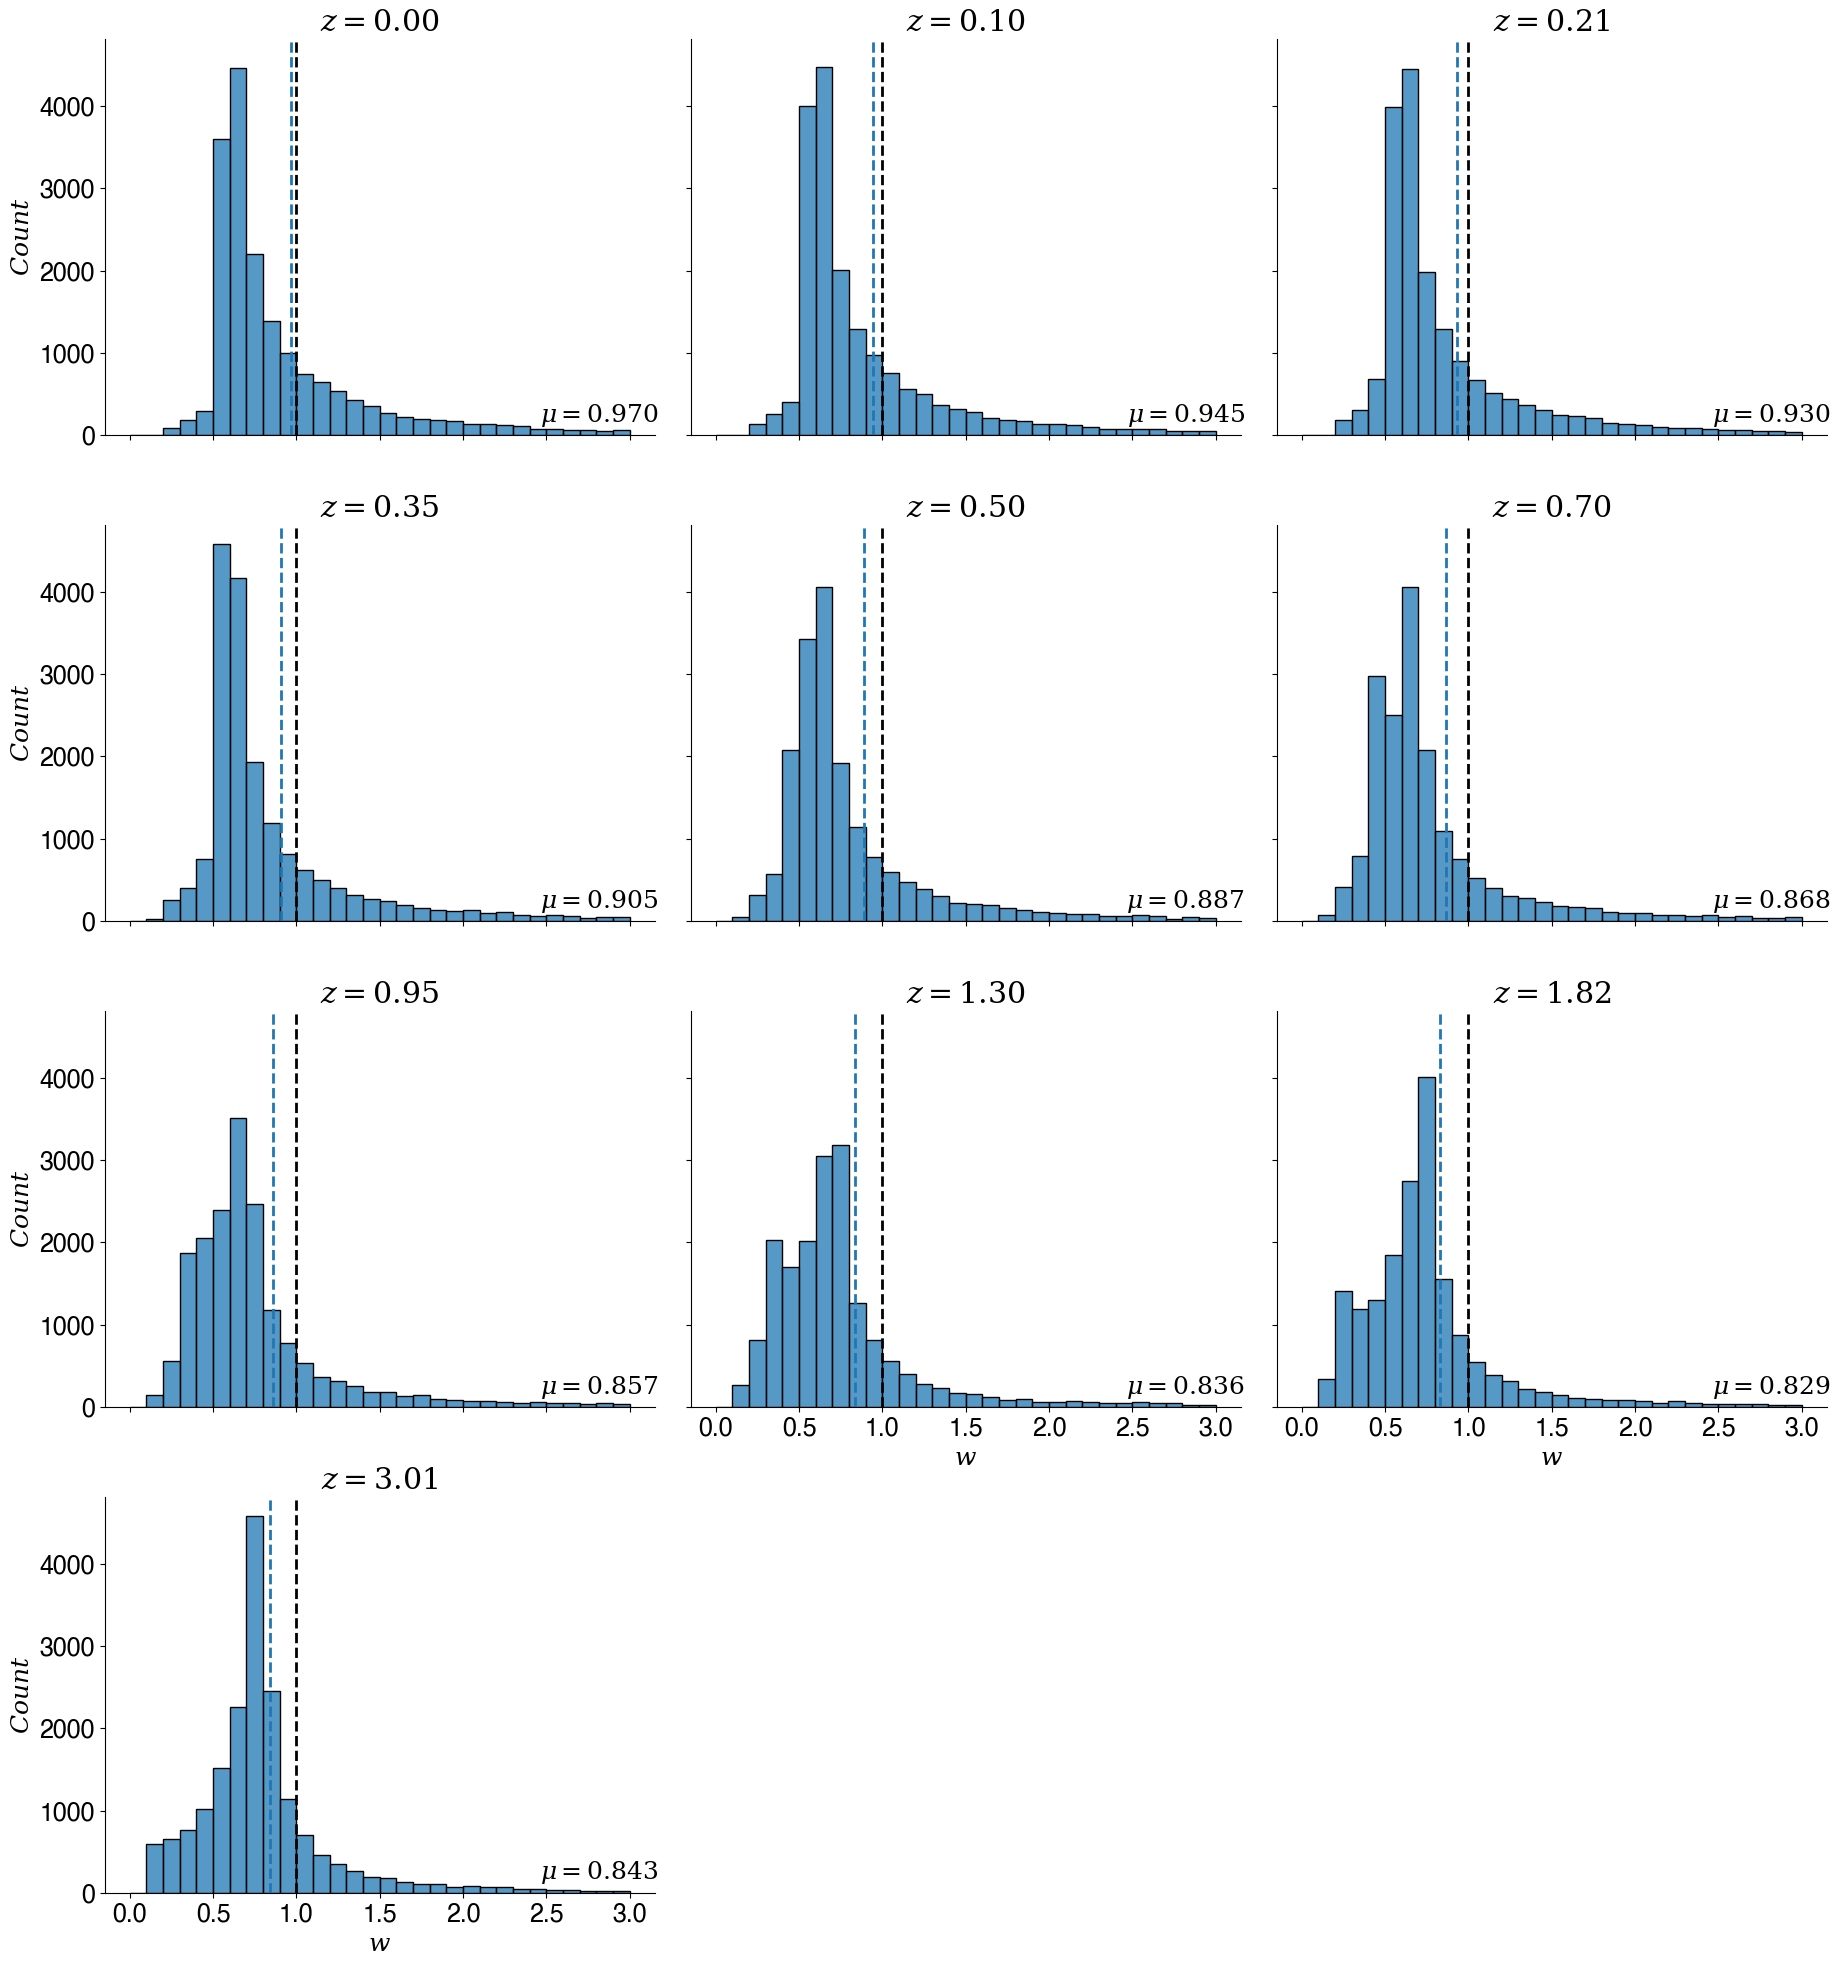

In [32]:
g = sns.FacetGrid(df_weights, col="SnapNum", aspect=1.25, height=5, col_wrap=3, col_order=snapshots)
g.map_dataframe(sns.histplot, x="weight", bins=30, binrange=[0, 3])
g.map_dataframe(annotate)
g.refline(x=1, color='k', ls='--', lw=2)

axes = g.axes.flatten()
for i, ax in enumerate(axes):
    ax.set_title(f'$z = {redshifts[i]:.2f}$')

g.set_xlabels(r'$w$')
g.set_ylabels(r'$Count$')
g.tight_layout()
#plt.savefig('plots/paper/weight_distribution_naive_model_stellar_mass.png', dpi=300, bbox_inches='tight')
plt.show()

In [33]:
mpl.rcParams['figure.figsize'] = [6, 8]
mpl.rcParams['legend.fontsize'] = 16
mpl.rcParams['font.family'] = "Helvetica"
mpl.rcParams['mathtext.fontset'] = 'dejavuserif'
mpl.rcParams['font.size'] = 18
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [34]:
# Selecting all snapshots back to z=3, peak star formation happens around z=2
snapshots = [99, 91, 83, 75, 67, 59, 51, 43, 35, 25, 13]
print(snapshots)

[99, 91, 83, 75, 67, 59, 51, 43, 35, 25, 13]


In [35]:
redshifts = np.load('data/redshifts.npy')
redshifts = np.flip(redshifts)[snapshots]
print(redshifts)

[2.22044605e-16 9.94018026e-02 2.14425036e-01 3.47853842e-01
 5.03047523e-01 7.00106354e-01 9.50531352e-01 1.30237846e+00
 1.82268925e+00 3.00813107e+00 6.01075740e+00]


In [36]:
ages = np.load('data/ages.npy')
ages = np.flip(ages)[snapshots]
print(ages)
print(np.diff(ages))

[13.80271833 12.46636383 11.13756151  9.83708686  8.58656951  7.31414105
  6.07331943  4.81591437  3.59298263  2.14538275  0.93171893]
[-1.33635449 -1.32880232 -1.30047466 -1.25051734 -1.27242847 -1.24082162
 -1.25740506 -1.22293174 -1.44759988 -1.21366382]


In [38]:
df_balance = pd.read_hdf('results/causal_model_halo_mass/balance_marginal_effect_no_trimming.h5', 'snapshots_all')

In [39]:
df_balance

,aacc_original,aacc_weighted
SnapNum,,
99,0.358132,0.237953
91,0.358558,0.337353
83,0.365229,0.327862
75,0.379183,0.309119
67,0.398585,0.355733
59,0.41403,0.354846
51,0.426511,0.329847
43,0.429334,0.371337
35,0.407936,0.27931


In [40]:
df_balance = df_balance.reset_index()

In [41]:
df_balance

,SnapNum,aacc_original,aacc_weighted
0,99,0.358132,0.237953
1,91,0.358558,0.337353
2,83,0.365229,0.327862
3,75,0.379183,0.309119
4,67,0.398585,0.355733
5,59,0.41403,0.354846
6,51,0.426511,0.329847
7,43,0.429334,0.371337
8,35,0.407936,0.27931
9,25,0.374621,0.329086


In [42]:
df_balance['redshift'] = redshifts

In [43]:
df_balance['redshift']= df_balance['redshift'].map('{:.2f}'.format)

In [44]:
df_balance['redshift'] = r"$z=" + df_balance['redshift'] + "$"

In [45]:
df_balance

,SnapNum,aacc_original,aacc_weighted,redshift
0,99,0.358132,0.237953,$z=0.00$
1,91,0.358558,0.337353,$z=0.10$
2,83,0.365229,0.327862,$z=0.21$
3,75,0.379183,0.309119,$z=0.35$
4,67,0.398585,0.355733,$z=0.50$
5,59,0.41403,0.354846,$z=0.70$
6,51,0.426511,0.329847,$z=0.95$
7,43,0.429334,0.371337,$z=1.30$
8,35,0.407936,0.27931,$z=1.82$
9,25,0.374621,0.329086,$z=3.01$


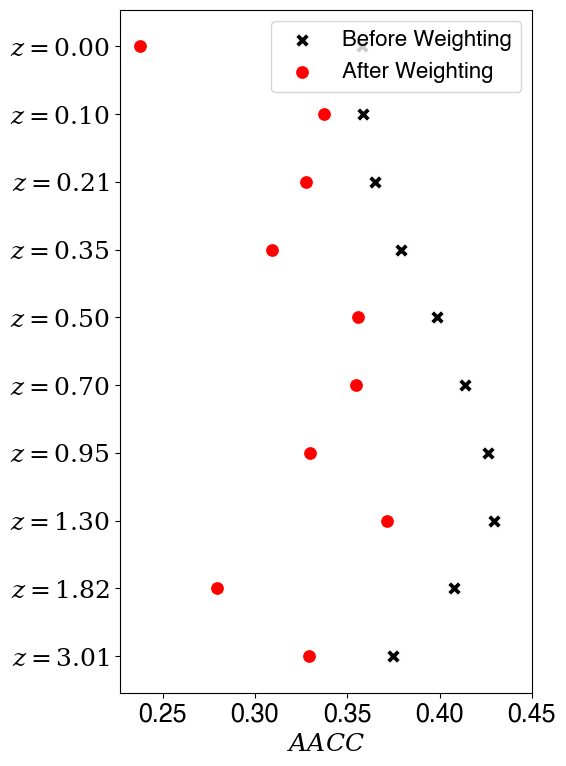

In [46]:
sns.scatterplot(df_balance, 
                x='aacc_original', 
                y='redshift',
                s=100,
                marker='X',
                color='k', #palette_tab10[7]
                #facecolor='none',
                #edgecolor='k',
                label='Before Weighting')

sns.scatterplot(df_balance, 
                x='aacc_weighted', 
                y='redshift',
                s=100,
                marker='o',
                color='red', # palette_tab10[8]
                #facecolor='none',
                #edgecolor='red',
                label='After Weighting')

plt.xlabel(r'$AACC$')
#plt.ylabel(r'$z$')
plt.ylabel('')
plt.legend()
plt.tight_layout()
#plt.savefig('plots/paper/marginal_balance.png', dpi=300, bbox_inches='tight')
plt.show()